# Relatório – Consulta Cadastro Integrado de Projetos de Investimentos – Obrasgov.br 

In [1]:
# Instala pacotes necessários
!pip install -r requirements.txt

# Bibliotecas utilizadas
import sqlite3
import requests
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns


## 1. Extração de Dados

In [2]:
# O filtro para obter apenas dados do DF foi aplicado diretamente na URL
url = 'https://api.obrasgov.gestao.gov.br/obrasgov/api/projeto-investimento?uf=DF'

try:
    response = requests.get(url, timeout=30)
    response.raise_for_status()
    dados_json = response.json()

    lista_projetos = dados_json['content']
    df = pd.DataFrame(lista_projetos)

except requests.exceptions.HTTPError as errh:
    print(f"\n{errh}")
except requests.exceptions.RequestException as err:
    print(f"\n{err}")

df.head()

,idUnico,nome,cep,endereco,descricao,funcaoSocial,metaGlobal,dataInicialPrevista,dataFinalPrevista,dataInicialEfetiva,...,observacoesPertinentes,isModeladaPorBim,dataSituacao,tomadores,executores,repassadores,eixos,tipos,subTipos,fontesDeRecurso
0,50379.53-54,DL - 304/2024 - Contratação de instituição par...,None,None,Contratação de instituição para execução de se...,Ampliação da capacidade de trafego visando a m...,Projetos Básicos e Executivos de Engenharia,2024-12-20,2027-12-05,None,...,None,False,2024-12-20,[],[{'nome': 'DEPARTAMENTO NACIONAL DE INFRAESTRU...,[],"[{'id': 3, 'descricao': 'Econômico'}]","[{'id': 25, 'descricao': 'Rodovia', 'idEixo': 3}]","[{'id': 4, 'descricao': 'Acessos Terrestres', ...","[{'origem': 'Federal', 'valorInvestimentoPrevi..."
1,42724.53-27,Escola Classe Crixá São Sebastião,None,None,"Construção de Escola em Tempo Integral, Escola...",A construção da nova escola beneficiará 977 es...,"Construção de Escola em Tempo Integral, Escola...",2024-09-02,2028-09-02,None,...,None,False,2025-09-05,[],[{'nome': 'SECRETARIA DE ESTADO DE EDUCACAO DO...,[{'nome': 'FUNDO NACIONAL DE DESENVOLVIMENTO D...,"[{'id': 4, 'descricao': 'Social'}]","[{'id': 46, 'descricao': 'Educação', 'idEixo':...","[{'id': 84, 'descricao': 'Educação', 'idTipo':...","[{'origem': 'Federal', 'valorInvestimentoPrevi..."
2,19970.53-78,Reajuste do Contrato 45/2021 - Contrução do Ce...,70.602-600,"SAIS Área Especial 3, Setor Policial Sul",Reajuste do Contrato 45/2021 - Construção do C...,Contribuir para a melhor formação dos bombeiro...,Construção de um novo centro de formação e de ...,2021-09-14,2024-08-28,None,...,None,False,2023-02-06,[],[{'nome': 'CORPO DE BOMBEIROS MILITAR DO DISTR...,[{'nome': 'CORPO DE BOMBEIROS MILITAR DO DISTR...,"[{'id': 1, 'descricao': 'Administrativo'}]","[{'id': 1, 'descricao': 'Segurança Pública', '...","[{'id': 59, 'descricao': 'Obras em Imóveis de ...","[{'origem': 'Federal', 'valorInvestimentoPrevi..."
3,24797.53-15,Implantação de Passarelas nas Estradas Parque ...,None,None,Implantação de passarelas de estrutura mista n...,"Pedestres, no geral, demanda das ocupações lin...",Implantação de passarelas de estrutura mista n...,2023-08-30,2028-08-30,None,...,None,False,2023-08-28,[],[{'nome': 'DEPARTAMENTO DE ESTRADAS DE RODAGEM...,"[{'nome': 'MINISTÉRIO DAS CIDADES', 'codigo': ...","[{'id': 3, 'descricao': 'Econômico'}]","[{'id': 24, 'descricao': 'Infraestrutura Urban...","[{'id': 57, 'descricao': 'Obra de Arte Especia...","[{'origem': 'Federal', 'valorInvestimentoPrevi..."
4,24822.53-70,"obra de construção da Cabine de Medição, loca...",None,None,"obra de construção da Cabine de Medição, loca...",A demanda de carga elétrica do Campus Darcy Ri...,A demanda de carga elétrica do Campus Darcy Ri...,2023-09-14,2024-03-14,None,...,None,False,2023-08-29,[],"[{'nome': 'FUNDACAO UNIVERSIDADE DE BRASILIA',...","[{'nome': 'FUNDACAO UNIVERSIDADE DE BRASILIA',...","[{'id': 3, 'descricao': 'Econômico'}, {'id': 3...","[{'id': 31, 'descricao': 'Energia', 'idEixo': ...","[{'id': 95, 'descricao': 'Subestação', 'idTipo...","[{'origem': 'Federal', 'valorInvestimentoPrevi..."


## 2. Busca Exploratória dos Dados
### 2.1. Visão Geral dos Dados

In [3]:
print("1. Dimensões do DataFrame")
num_linhas, num_colunas = df.shape
print(f"O conjunto possui: {num_linhas} linhas e {num_colunas} colunas.")

print("\n2. Nomes das Colunas")
print(df.columns.tolist())

print("\n3. Amostra dos Dados")
df.head()

1. Dimensões do DataFrame
O conjunto possui: 10 linhas e 31 colunas.

2. Nomes das Colunas
['idUnico', 'nome', 'cep', 'endereco', 'descricao', 'funcaoSocial', 'metaGlobal', 'dataInicialPrevista', 'dataFinalPrevista', 'dataInicialEfetiva', 'dataFinalEfetiva', 'dataCadastro', 'especie', 'natureza', 'naturezaOutras', 'situacao', 'descPlanoNacionalPoliticaVinculado', 'uf', 'qdtEmpregosGerados', 'descPopulacaoBeneficiada', 'populacaoBeneficiada', 'observacoesPertinentes', 'isModeladaPorBim', 'dataSituacao', 'tomadores', 'executores', 'repassadores', 'eixos', 'tipos', 'subTipos', 'fontesDeRecurso']

3. Amostra dos Dados


,idUnico,nome,cep,endereco,descricao,funcaoSocial,metaGlobal,dataInicialPrevista,dataFinalPrevista,dataInicialEfetiva,...,observacoesPertinentes,isModeladaPorBim,dataSituacao,tomadores,executores,repassadores,eixos,tipos,subTipos,fontesDeRecurso
0,50379.53-54,DL - 304/2024 - Contratação de instituição par...,None,None,Contratação de instituição para execução de se...,Ampliação da capacidade de trafego visando a m...,Projetos Básicos e Executivos de Engenharia,2024-12-20,2027-12-05,None,...,None,False,2024-12-20,[],[{'nome': 'DEPARTAMENTO NACIONAL DE INFRAESTRU...,[],"[{'id': 3, 'descricao': 'Econômico'}]","[{'id': 25, 'descricao': 'Rodovia', 'idEixo': 3}]","[{'id': 4, 'descricao': 'Acessos Terrestres', ...","[{'origem': 'Federal', 'valorInvestimentoPrevi..."
1,42724.53-27,Escola Classe Crixá São Sebastião,None,None,"Construção de Escola em Tempo Integral, Escola...",A construção da nova escola beneficiará 977 es...,"Construção de Escola em Tempo Integral, Escola...",2024-09-02,2028-09-02,None,...,None,False,2025-09-05,[],[{'nome': 'SECRETARIA DE ESTADO DE EDUCACAO DO...,[{'nome': 'FUNDO NACIONAL DE DESENVOLVIMENTO D...,"[{'id': 4, 'descricao': 'Social'}]","[{'id': 46, 'descricao': 'Educação', 'idEixo':...","[{'id': 84, 'descricao': 'Educação', 'idTipo':...","[{'origem': 'Federal', 'valorInvestimentoPrevi..."
2,19970.53-78,Reajuste do Contrato 45/2021 - Contrução do Ce...,70.602-600,"SAIS Área Especial 3, Setor Policial Sul",Reajuste do Contrato 45/2021 - Construção do C...,Contribuir para a melhor formação dos bombeiro...,Construção de um novo centro de formação e de ...,2021-09-14,2024-08-28,None,...,None,False,2023-02-06,[],[{'nome': 'CORPO DE BOMBEIROS MILITAR DO DISTR...,[{'nome': 'CORPO DE BOMBEIROS MILITAR DO DISTR...,"[{'id': 1, 'descricao': 'Administrativo'}]","[{'id': 1, 'descricao': 'Segurança Pública', '...","[{'id': 59, 'descricao': 'Obras em Imóveis de ...","[{'origem': 'Federal', 'valorInvestimentoPrevi..."
3,24797.53-15,Implantação de Passarelas nas Estradas Parque ...,None,None,Implantação de passarelas de estrutura mista n...,"Pedestres, no geral, demanda das ocupações lin...",Implantação de passarelas de estrutura mista n...,2023-08-30,2028-08-30,None,...,None,False,2023-08-28,[],[{'nome': 'DEPARTAMENTO DE ESTRADAS DE RODAGEM...,"[{'nome': 'MINISTÉRIO DAS CIDADES', 'codigo': ...","[{'id': 3, 'descricao': 'Econômico'}]","[{'id': 24, 'descricao': 'Infraestrutura Urban...","[{'id': 57, 'descricao': 'Obra de Arte Especia...","[{'origem': 'Federal', 'valorInvestimentoPrevi..."
4,24822.53-70,"obra de construção da Cabine de Medição, loca...",None,None,"obra de construção da Cabine de Medição, loca...",A demanda de carga elétrica do Campus Darcy Ri...,A demanda de carga elétrica do Campus Darcy Ri...,2023-09-14,2024-03-14,None,...,None,False,2023-08-29,[],"[{'nome': 'FUNDACAO UNIVERSIDADE DE BRASILIA',...","[{'nome': 'FUNDACAO UNIVERSIDADE DE BRASILIA',...","[{'id': 3, 'descricao': 'Econômico'}, {'id': 3...","[{'id': 31, 'descricao': 'Energia', 'idEixo': ...","[{'id': 95, 'descricao': 'Subestação', 'idTipo...","[{'origem': 'Federal', 'valorInvestimentoPrevi..."


In [4]:
print("\n4. Tipos de Variáveis e Contagem de Nulos")
df.info()


4. Tipos de Variáveis e Contagem de Nulos
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 31 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   idUnico                             10 non-null     object
 1   nome                                10 non-null     object
 2   cep                                 6 non-null      object
 3   endereco                            6 non-null      object
 4   descricao                           10 non-null     object
 5   funcaoSocial                        10 non-null     object
 6   metaGlobal                          10 non-null     object
 7   dataInicialPrevista                 10 non-null     object
 8   dataFinalPrevista                   10 non-null     object
 9   dataInicialEfetiva                  0 non-null      object
 10  dataFinalEfetiva                    0 non-null      object
 11  dataCadastro      

In [5]:
# Calcula o percentual de valores nulos por coluna
valores_nulos = df.isnull().sum()
percentual_nulos = (valores_nulos / len(df)) * 100

tabela_nulos = pd.DataFrame({
    'Contagem de Nulos': valores_nulos,
    'Taxa de Nulos (%)': percentual_nulos
})

tabela_nulos = tabela_nulos[tabela_nulos['Contagem de Nulos'] > 0].sort_values(by='Taxa de Nulos (%)', ascending=False)

print("\n5. Análise dos Valores Nulos")
tabela_nulos


5. Análise dos Valores Nulos


,Contagem de Nulos,Taxa de Nulos (%)
dataInicialEfetiva,10,100.0
observacoesPertinentes,10,100.0
dataFinalEfetiva,10,100.0
populacaoBeneficiada,9,90.0
qdtEmpregosGerados,9,90.0
descPopulacaoBeneficiada,8,80.0
descPlanoNacionalPoliticaVinculado,8,80.0
naturezaOutras,6,60.0
cep,4,40.0
endereco,4,40.0


In [6]:
# Análise das colunas que parecem ter uma estrutura aninhada
colunas_aninhadas = [
    'tomadores',
    'executores', 
    'repassadores', 
    'eixos', 
    'tipos', 
    'subTipos', 
    'fontesDeRecurso'
]
for coluna in colunas_aninhadas:
    if coluna not in df.columns:
        continue
    valor_nao_nulo = df[coluna].dropna().iloc[0] if not df[coluna].dropna().empty else None

    print(f"\n--- Coluna: '{coluna}' ---")
    if valor_nao_nulo is not None:
        print(f"Tipo de Dado: {type(valor_nao_nulo)}")
        print(f"Conteúdo: {valor_nao_nulo}")


--- Coluna: 'tomadores' ---
Tipo de Dado: <class 'list'>
Conteúdo: []

--- Coluna: 'executores' ---
Tipo de Dado: <class 'list'>
Conteúdo: [{'nome': 'DEPARTAMENTO NACIONAL DE INFRAESTRUTURA DE TRANSPORTES', 'codigo': 54844}]

--- Coluna: 'repassadores' ---
Tipo de Dado: <class 'list'>
Conteúdo: []

--- Coluna: 'eixos' ---
Tipo de Dado: <class 'list'>
Conteúdo: [{'id': 3, 'descricao': 'Econômico'}]

--- Coluna: 'tipos' ---
Tipo de Dado: <class 'list'>
Conteúdo: [{'id': 25, 'descricao': 'Rodovia', 'idEixo': 3}]

--- Coluna: 'subTipos' ---
Tipo de Dado: <class 'list'>
Conteúdo: [{'id': 4, 'descricao': 'Acessos Terrestres', 'idTipo': 25}]

--- Coluna: 'fontesDeRecurso' ---
Tipo de Dado: <class 'list'>
Conteúdo: [{'origem': 'Federal', 'valorInvestimentoPrevisto': 44463443.0}]


### 2.2. Estatísticas descritivas
### 2.2.1. Estatísticas de Variáveis Númericas

In [7]:
colunas_numericas = ['qdtEmpregosGerados', 'populacaoBeneficiada']
for coluna in colunas_numericas:
    df[coluna] = pd.to_numeric(df[coluna], errors='coerce')

estatisticas_numericas = df[colunas_numericas].describe()
estatisticas_numericas.T

,count,mean,std,min,25%,50%,75%,max
qdtEmpregosGerados,1.0,30.0,NaN,30.0,30.0,30.0,30.0,30.0
populacaoBeneficiada,1.0,385.0,NaN,385.0,385.0,385.0,385.0,385.0


### 2.2.2. Estatísticas de Variáveis Não-Númericas

In [8]:
print("\nVisão Geral:")
print(df.describe(include=['object']).T)

print("\n\nDistribuição de Frequência")

print("\n1. Situação das Obras:")
print(df['situacao'].value_counts())

print("\n2. Espécie das Obras:")
print(df['especie'].value_counts())

print("\n3. Natureza das Intervenções:")
print(df['natureza'].value_counts())

print("\n4. UF dos Projetos:")
df['uf'].value_counts()


Visão Geral:
                                   count unique  \
idUnico                               10     10   
nome                                  10      8   
cep                                    6      4   
endereco                               6      3   
descricao                             10      8   
funcaoSocial                          10      8   
metaGlobal                            10      8   
dataInicialPrevista                   10      8   
dataFinalPrevista                     10      8   
dataInicialEfetiva                     0      0   
dataFinalEfetiva                       0      0   
dataCadastro                          10      7   
especie                               10      3   
natureza                              10      3   
naturezaOutras                         4      2   
situacao                              10      2   
descPlanoNacionalPoliticaVinculado     2      2   
uf                                    10      1   
descPopulacaoBene

uf
DF    10
Name: count, dtype: int64

### 2.3. Qualidade do código

#### 2.3.1 Análise de Completude

Com base na tabela de valores nulos, podemos dividir os problemas de qualidade em três:

*1: Colunas Inutilizáveis (Taxa de Nulos de 100%)*

- Colunas: dataInicialEfetiva, dataFinalEfetiva, observacoesPertinentes.

- Diagnóstico: Estão completamente vazias. Não contêm nenhuma informação para a amostra de dados.

- Ação: Remover essas colunas do DataFrame para simplificar a análise e evitar confusão.

*2: Colunas Não Confiáveis (Taxa de Nulos > 80%)*

- Colunas: qdtEmpregosGerados, populacaoBeneficiada, descPlanoNacionalPoliticaVinculado, descPopulacaoBeneficiada.

- Diagnóstico: Contêm poucos dados (apenas 1 ou 2 registros). Qualquer cálculo de média, soma ou outra estatística não seria representativo da realidade.

- Ação: Manter as colunas, mas desconsiderar análise sobre elas devido a suas limitações.

*3: Colunas com Dados Parciais (Taxa de Nulos < 50%)*

- Colunas: cep, endereco, naturezaOutras, isModeladaPorBim.

- Diagnóstico: São utilizáveis, mas algumas análises(plotar os projetos usando o cep) ficaria inviável.

- Ação: Manter as colunas.

### 2.3.2 Análise Estrutural

- Colunas: tomadores, executores, repassadores, eixos, tipos, subTipos e fontesDeRecurso.

- Diagnóstico: Estas colunas não contêm valores atômicos, mas sim estruturas de dados, especificamente listas de dicionários(ex: [{'id': ..., 'descricao': ...}]). O formato é inadequado para a estrutura dos DataFrames

- Impacto na Qualidade: A estrutura aninhada impede a realização de filtros, agregações e análises diretas, além de ser incompatível com o armazenamento em bancos de dados relacionais.

- Ação: Aplicar um processo para extrair a informação mais relevante de cada estrutura (como o valor da chave 'descricao' ou 'nome') para novas colunas dedicadas. As colunas originais serão removidas após a extração.

### 2.3.3 Análise de Consistência e Validade

In [9]:
print("Categorias únicas em 'situacao':", df['situacao'].unique())
print("Categorias únicas em 'especie':", df['especie'].unique())

df['dataInicialPrevista'] = pd.to_datetime(df['dataInicialPrevista'], errors='coerce')
df['dataFinalPrevista'] = pd.to_datetime(df['dataFinalPrevista'], errors='coerce')
data_inconsistencia = df[df['dataFinalPrevista'] < df['dataInicialPrevista']]
print(f"\nNúmero de datas inconsistentes: {len(data_inconsistencia)}")

Categorias únicas em 'situacao': ['Cadastrada' 'Cancelada']
Categorias únicas em 'especie': ['Construção' 'Recuperação' 'Reforma']

Número de datas inconsistentes: 0


## 3. Tratamento dos Dados

### 3.1 Correção na Tipagem

In [10]:
# Conversão de Datas
colunas_data = [
    'dataInicialPrevista', 'dataFinalPrevista', 'dataInicialEfetiva',
    'dataFinalEfetiva', 'dataCadastro', 'dataSituacao'
]
for coluna in colunas_data:
    df[coluna] = pd.to_datetime(df[coluna], errors='coerce')

# Conversão de Colunas Numéricas
colunas_numericas = ['qdtEmpregosGerados', 'populacaoBeneficiada']
for coluna in colunas_numericas:
    df[coluna] = pd.to_numeric(df[coluna], errors='coerce')

# Conversão de Colunas Booleanas
colunas_booleanas = ['isModeladaPorBim']
for coluna in colunas_booleanas:
    df[coluna] = df[coluna].astype(bool)

# Normalização de Texto
colunas_texto_chave = [
    'situacao', 'especie', 'natureza', 'uf'
]
for coluna in colunas_texto_chave:
    df[coluna] = (
        df[coluna]
        .astype('string')
        .str.strip()
        .str.lower()
        .replace({'—': pd.NA, '-': pd.NA})
    )

# Texto descritivo
colunas_texto = [
    'nome', 'descricao', 'funcaoSocial', 'metaGlobal',
    'naturezaOutras', 'descPlanoNacionalPoliticaVinculado',
    'descPopulacaoBeneficiada', 'observacoesPertinentes', 'endereco'
]
for coluna in colunas_texto:
    df[coluna] = df[coluna].astype('string').replace({'—': pd.NA, '-': pd.NA})

# Categorias
colunas_categoria = [
    'especie', 'natureza', 'situacao', 'uf'
]
for coluna in colunas_categoria:
    df[coluna] = df[coluna].astype('category')

# Campos identificadores e códigos
colunas_identificadores = ['idUnico', 'cep']
for coluna in colunas_identificadores:
    df[coluna] = df[coluna].astype('string')

# Verificação 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 31 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   idUnico                             10 non-null     string        
 1   nome                                10 non-null     string        
 2   cep                                 6 non-null      string        
 3   endereco                            6 non-null      string        
 4   descricao                           10 non-null     string        
 5   funcaoSocial                        10 non-null     string        
 6   metaGlobal                          10 non-null     string        
 7   dataInicialPrevista                 10 non-null     datetime64[ns]
 8   dataFinalPrevista                   10 non-null     datetime64[ns]
 9   dataInicialEfetiva                  0 non-null      datetime64[ns]
 10  dataFinalEfetiva             

### 3.2 Normalização dos Dados

In [11]:
mapping = {
    'qdt': 'quantidade',
    'desc': 'descricao',
    'is': 'é'
}

def camel_to_snake(name: str) -> str:
    # Separar `ABcDef` -> `ABc_Def`
    name = re.sub(r'(.)([A-Z][a-z]+)', r'\1_\2', name)
    # Separar `aB` -> `a_B`
    name = re.sub(r'([a-z0-9])([A-Z])', r'\1_\2', name)
    return name

def normaliza_colunas(col: str) -> str:
    snake = camel_to_snake(col)
    snake = snake.lower().strip('_')
    # Divide em tokens e aplica o mapping somente para tokens inteiros
    tokens = [t for t in snake.split('_') if t != '']
    tokens_normalizados = [mapping.get(t, t) for t in tokens]
    return '_'.join(tokens_normalizados)

# Aplica ao DataFrame
novos_nomes = [normaliza_colunas(c) for c in df.columns]
df.columns = novos_nomes
print(df.columns.tolist())

# Remove duplicatas
duplicatas = df.duplicated(subset=['id_unico']).sum()
if duplicatas > 0:
    df.drop_duplicates(subset=['id_unico'], inplace=True)

# Tratamento de valores ausentes
colunas_removidas = ['data_inicial_efetiva', 'data_final_efetiva', 'observacoes_pertinentes']
df = df.drop(columns=colunas_removidas)
df.shape

['id_unico', 'nome', 'cep', 'endereco', 'descricao', 'funcao_social', 'meta_global', 'data_inicial_prevista', 'data_final_prevista', 'data_inicial_efetiva', 'data_final_efetiva', 'data_cadastro', 'especie', 'natureza', 'natureza_outras', 'situacao', 'descricao_plano_nacional_politica_vinculado', 'uf', 'quantidade_empregos_gerados', 'descricao_populacao_beneficiada', 'populacao_beneficiada', 'observacoes_pertinentes', 'é_modelada_por_bim', 'data_situacao', 'tomadores', 'executores', 'repassadores', 'eixos', 'tipos', 'sub_tipos', 'fontes_de_recurso']


(10, 28)

### 3.3 Tratamento de Dados Aninhados

In [12]:
mapeamento_extracao = {
    # Coluna Original      # Prefixo Novas Colunas   # Chaves para Extrair
    'tomadores':         {'prefixo': 'tomador',        'chaves': ['nome', 'codigo']},
    'executores':        {'prefixo': 'executor',       'chaves': ['nome', 'codigo']},
    'repassadores':      {'prefixo': 'repassador',     'chaves': ['nome', 'codigo']},
    'eixos':             {'prefixo': 'eixo',           'chaves': ['id', 'descricao']},
    'tipos':             {'prefixo': 'tipo',           'chaves': ['id', 'descricao', 'id_eixo']},
    'sub_tipos':          {'prefixo': 'sub_tipo',        'chaves': ['id', 'descricao', 'id_tipo']},
    'fontes_de_recurso':   {'prefixo': 'fonte_recurso',  'chaves': ['origem', 'valor_investimento_previsto']}
}

def extrair_dados_aninhados(lista_aninhada, chaves_desejadas):
    if not isinstance(lista_aninhada, list) or not lista_aninhada:
        return {chave: None for chave in chaves_desejadas}

    primeiro_item = lista_aninhada[0]
    if isinstance(primeiro_item, dict):
        return {chave: primeiro_item.get(chave) for chave in chaves_desejadas}
    
    return {chave: None for chave in chaves_desejadas}

df_tratado = df.copy()
colunas_removidas = []
for coluna_original, config in mapeamento_extracao.items():
    if coluna_original not in df_tratado.columns:
        continue
    
    prefixo = config['prefixo']
    chaves = config['chaves']
    
    # Aplica a função para extrair os dicionários de cada linha
    dados_extraidos = df_tratado[coluna_original].apply(lambda linha: extrair_dados_aninhados(linha, chaves))
    df_novas_colunas = pd.json_normalize(dados_extraidos)
    df_novas_colunas.columns = [f"{prefixo}_{col}" for col in df_novas_colunas.columns]
    df_tratado = df_tratado.join(df_novas_colunas)
    colunas_removidas.append(coluna_original)

df_tratado = df_tratado.drop(columns=colunas_removidas)

# Padroniza o tipo de dado que foi extraido do dicionário de 'object' para 'string'
colunas_para_converter = df_tratado.select_dtypes(include=['object']).columns
df_tratado[colunas_para_converter] = df_tratado[colunas_para_converter].astype('string')
novas_colunas_criadas = [col for col in df_tratado.columns if any(p in col for p in [c['prefixo'] for c in mapeamento_extracao.values()])]

df = df_tratado
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 37 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   id_unico                                     10 non-null     string        
 1   nome                                         10 non-null     string        
 2   cep                                          6 non-null      string        
 3   endereco                                     6 non-null      string        
 4   descricao                                    10 non-null     string        
 5   funcao_social                                10 non-null     string        
 6   meta_global                                  10 non-null     string        
 7   data_inicial_prevista                        10 non-null     datetime64[ns]
 8   data_final_prevista                          10 non-null     datetime64[ns]
 9   da

### 3.4 Relatório de inconsistências

Durante a fase de **análise exploratória**, foram identificadas diversas anomalias e inconsistências no conjunto de dados. A partir dessas observações, foram executados os seguintes tratamentos:

* **Problema de Completude:**
  Verificou-se uma alta taxa de valores nulos em algumas colunas. As colunas `data_inicial_efetiva`, `data_final_efetiva` e `observacoes_pertinentes` foram removidas por estarem 100% vazias. Já colunas como `quantidade_empregos_gerados` e `populacao_beneficiada`, que apresentavam mais de 80% de ausência de dados, foram mantidas, porém não serão utilizadas para análise dos dados.

* **Problema de Tipagem:**  
  Inicialmente, diversas colunas do conjunto de dados apresentavam o tipo genérico `object`, incluindo campos de datas, valores numéricos, booleanos e categorias. Essa inconsistência impedia a realização de operações temporais, estatísticas e comparações diretas entre valores.  

  Após o tratamento, as colunas foram convertidas para tipos apropriados, para maior consistência e eficiência nas análises:  

  - **Datas:** convertidas para `datetime64[ns]`  
    *(ex.: `data_inicial_prevista`, `data_final_prevista`, `data_inicial_efetiva`, `data_final_efetiva`, `data_cadastro`, `data_situacao`).*  

  - **Valores numéricos:** convertidos para `float64`  
    *(ex.: `quantidade_empregos_gerados`, `populacao_beneficiada`).*  

  - **Campos booleanos:** convertidos para `bool`  
    *(ex.: `é_modelada_por_bim`).*  

  - **Colunas categóricas:** convertidas para `category`  
    *(ex.: `especie`, `natureza`, `situacao`, `uf`).*  

  - **Textos descritivos e identificadores:** permaneceram como `string`  
    *(ex.: `nome`, `descricao`, `funcao_social`, `meta_global`, `natureza_outras`, `descricao_plano_nacional_politica_vinculado`, `descricao_populacao_beneficiada`, `observacoes_pertinentes`, `endereco`, `id_unico`, `cep`).*  

* **Problema de Estrutura (Dados Aninhados):** As colunas`tomadores`, `executores`, `eixos`, `tipos`, `sub_tipos`, `fontes_de_recurso` continham dados em formato de listas de dicionários. Esta estrutura impedia a análise direta e era incompatível com o armazenamento em um banco de dados relacional. Para corrigir, foi aplicado um tratamento, onde todas as informações de cada estrutura aninhada (como id, descricao, codigo, valorInvestimentoPrevisto, etc.) foram extraídas para novas colunas prefixadas (ex: eixo_id, eixo_descricao). As colunas originais foram removidas após a extração.

* **Consistência Lógica:**
  Foi realizada uma verificação para identificar projetos cuja `data_final_prevista` fosse anterior à `data_inicial_prevista`. Nenhuma inconsistência foi encontrada.

**Conclusão:** Após os ajustes, o DataFrame apresenta tipagem adequada, está livre de colunas inutilizáveis e possui suas limitações documentadas.

## 4. Armazenamento dos Dados

### 4.1 Conexão com Banco de Dados

In [13]:
db_filename = 'obras_governo_df.db'
con = sqlite3.connect(db_filename)

# Dimensão Eixos
df_eixos = df[['eixo_id', 'eixo_descricao']].drop_duplicates().dropna()
df_eixos.to_sql('dim_eixos', con, if_exists='replace', index=False)

# Dimensão Tipos
df_tipos = df[['tipo_id', 'tipo_descricao', 'tipo_id_eixo']].drop_duplicates().dropna()
df_tipos.rename(columns={'tipo_id_eixo': 'eixo_id'}, inplace=True)
df_tipos.to_sql('dim_tipos', con, if_exists='replace', index=False)

# Dimensão Subtipos
df_subtipos = df[['sub_tipo_id', 'sub_tipo_descricao', 'sub_tipo_id_tipo']].drop_duplicates().dropna()
df_subtipos.rename(columns={'sub_tipo_id_tipo': 'tipo_id'}, inplace=True)
df_subtipos.to_sql('dim_subtipos', con, if_exists='replace', index=False)

# Dimensão Organizações 
tomadores = df[['tomador_codigo', 'tomador_nome']].rename(columns={'tomador_codigo':'organizacao_codigo', 'tomador_nome':'organizacao_nome'})
executores = df[['executor_codigo', 'executor_nome']].rename(columns={'executor_codigo':'organizacao_codigo', 'executor_nome':'organizacao_nome'})
repassadores = df[['repassador_codigo', 'repassador_nome']].rename(columns={'repassador_codigo':'organizacao_codigo', 'repassador_nome':'organizacao_nome'})
df_organizacoes = pd.concat([tomadores, executores, repassadores]).drop_duplicates().dropna(subset=['organizacao_codigo'])
df_organizacoes.to_sql('dim_organizacoes', con, if_exists='replace', index=False)

# Fato
colunas_fato = df.drop(columns=[
    'tomador_nome', 'executor_nome', 'repassador_nome',
    'eixo_descricao', 'tipo_descricao', 'sub_tipo_descricao',
    'tipo_id_eixo', 'sub_tipo_id_tipo'
])
colunas_fato.to_sql('fato_projetos', con, if_exists='replace', index=False)

print("\nVerificando o modelo com uma consulta SQL")

query = """
SELECT
    p.nome AS nome_projeto,
    org.organizacao_nome AS nome_executor,
    e.eixo_descricao AS descricao_eixo,
    t.tipo_descricao AS descricao_tipo
FROM
    fato_projetos p
LEFT JOIN
    dim_organizacoes org ON p.executor_codigo = org.organizacao_codigo
LEFT JOIN
    dim_eixos e ON p.eixo_id = e.eixo_id
LEFT JOIN
    dim_tipos t ON p.tipo_id = t.tipo_id
LIMIT 5;
"""

df_verificacao = pd.read_sql_query(query, con)
print(df_verificacao)

con.close()


Verificando o modelo com uma consulta SQL
                                        nome_projeto  \
0  DL - 304/2024 - Contratação de instituição par...   
1                  Escola Classe Crixá São Sebastião   
2  Reajuste do Contrato 45/2021 - Contrução do Ce...   
3  Implantação de Passarelas nas Estradas Parque ...   
4  obra de construção da  Cabine de Medição, loca...   

                                       nome_executor  descricao_eixo  \
0  DEPARTAMENTO NACIONAL DE INFRAESTRUTURA DE TRA...       Econômico   
1  SECRETARIA DE ESTADO DE EDUCACAO DO DISTRITO F...          Social   
2     CORPO DE BOMBEIROS MILITAR DO DISTRITO FEDERAL  Administrativo   
3  DEPARTAMENTO DE ESTRADAS DE RODAGEM DO DISTRIT...       Econômico   
4                  FUNDACAO UNIVERSIDADE DE BRASILIA       Econômico   

  descricao_tipo  
0           None  
1           None  
2           None  
3           None  
4           None  


### 4.2 Documentação do Processo de Armazenamento

#### **Criação e Conexão**
Foi estabelecida uma conexão com um banco de dados local contido no arquivo `obras_governo_df.db`, utilizando a biblioteca padrão do Python, `sqlite3`.

#### **Criação do Modelo Relacional e Inserção dos Dados**
Para garantir a integridade dos dados, evitar redundância e seguir as melhores práticas de modelagem, optou-se por criar um **modelo relacional normalizado** em vez de uma única tabela grande. O modelo consiste em uma tabela central de **fatos** (`fato_projetos`) e múltiplas tabelas de **dimensão** que descrevem as entidades do negócio.

O processo de criação e inserção foi o seguinte:

1.  **Criação das Tabelas de Dimensão:**
    * A partir do DataFrame principal, foram criados DataFrames menores e distintos para cada entidade, removendo-se os valores duplicados.
    * As seguintes tabelas de dimensão foram geradas:
        * **`dim_eixos`**, **`dim_tipos`** e **`dim_subtipos`**: Para armazenar a hierarquia de classificação dos projetos de forma única.
        * **`dim_organizacoes`**: Para unificar os dados de tomadores, executores e repassadores em uma única tabela, evitando a repetição de nomes e códigos.

2.  **Criação da Tabela Fato:**
    * A tabela principal, **`fato_projetos`**, foi preparada removendo-se as colunas descritivas que já estavam presentes nas tabelas de dimensão.
    * Foram mantidas as colunas com os dados do projeto e as **chaves estrangeiras** (ex: `eixo_id`, `tipo_id`, `executor_codigo`) que se conectam às tabelas de dimensão.

3.  **Persistência no Banco:**
    * A estrutura de cada uma das tabelas (fato e dimensões) foi criada no SQLite utilizando o método `pandas.DataFrame.to_sql()`, que inferiu os tipos de dados SQL (`TEXT`, `REAL`, `INTEGER`) a partir dos Dtypes do Pandas.
    * Os dados de cada DataFrame preparado foram inseridos em suas respectivas tabelas no banco de dados.

#### **Validação do Modelo Relacional**
A integridade e o funcionamento do modelo foram validados através de uma consulta SQL que utilizou `JOINs`. A consulta uniu a tabela `fato_projetos` com as tabelas de dimensão para reconstruir a visão completa dos dados, confirmando que as relações via chaves primárias e estrangeiras foram estabelecidas corretamente e que a informação pode ser recuperada de forma consistente.

## 5. Análise Qualitativa

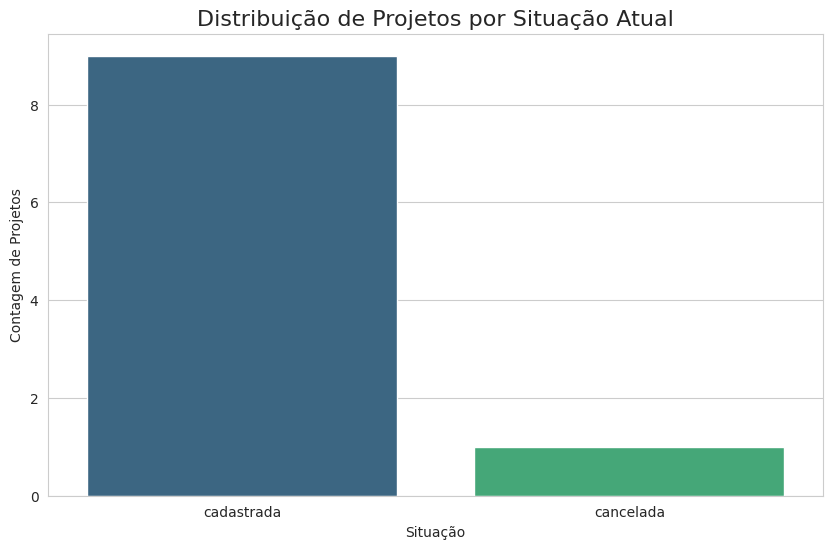

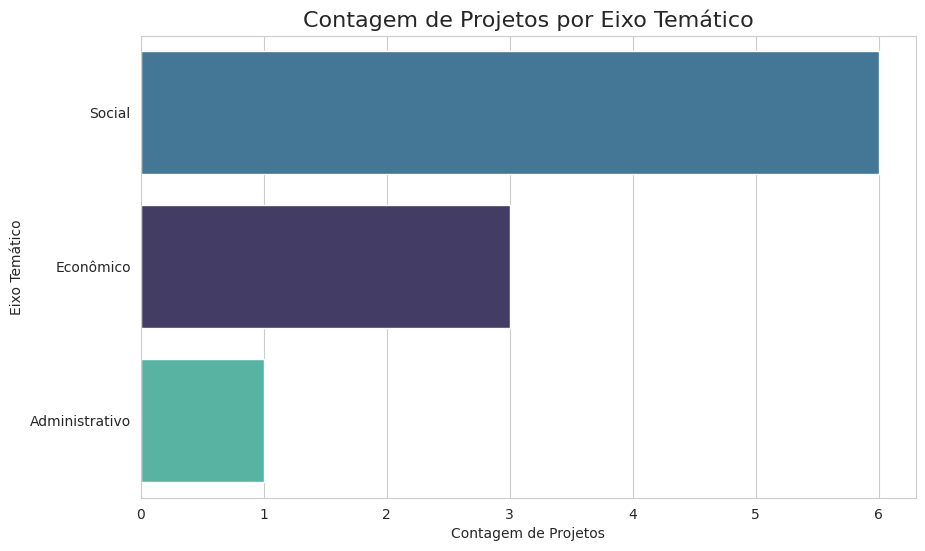

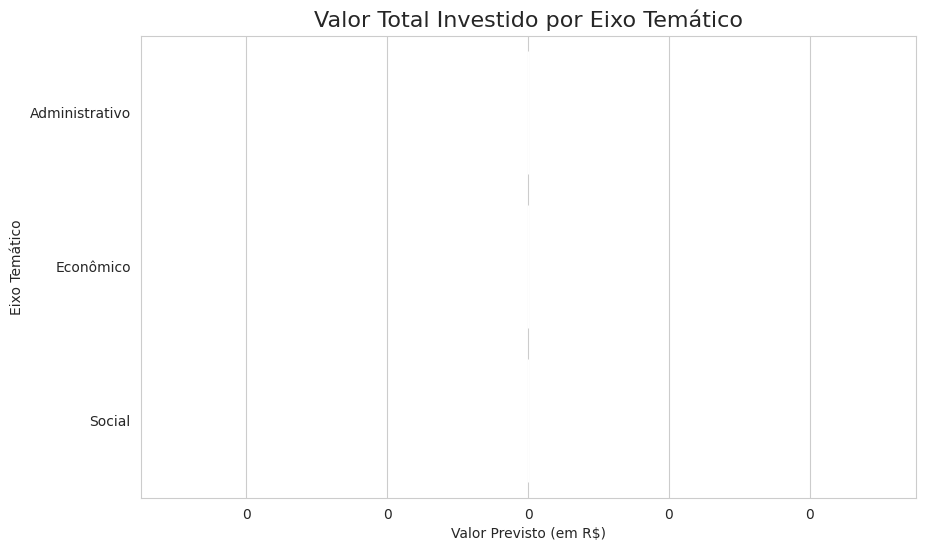

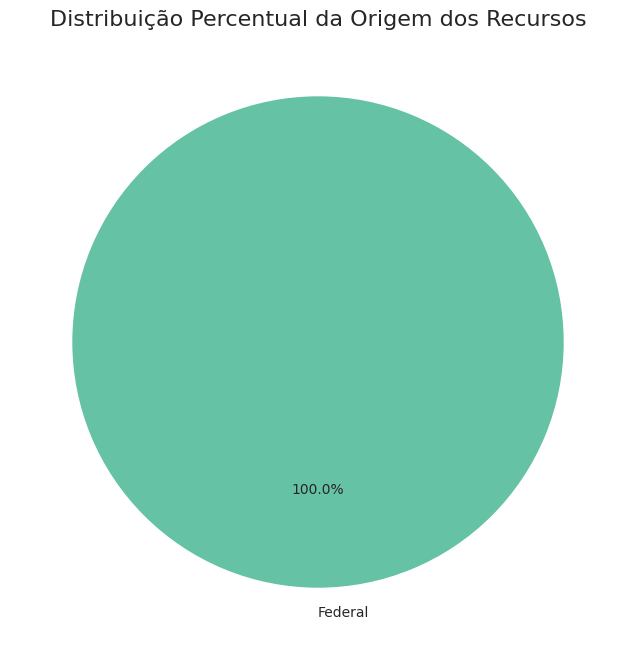

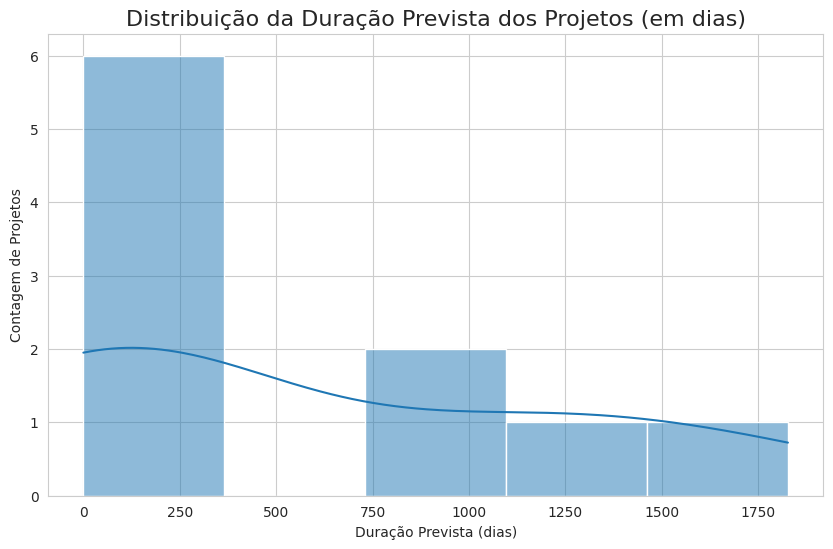

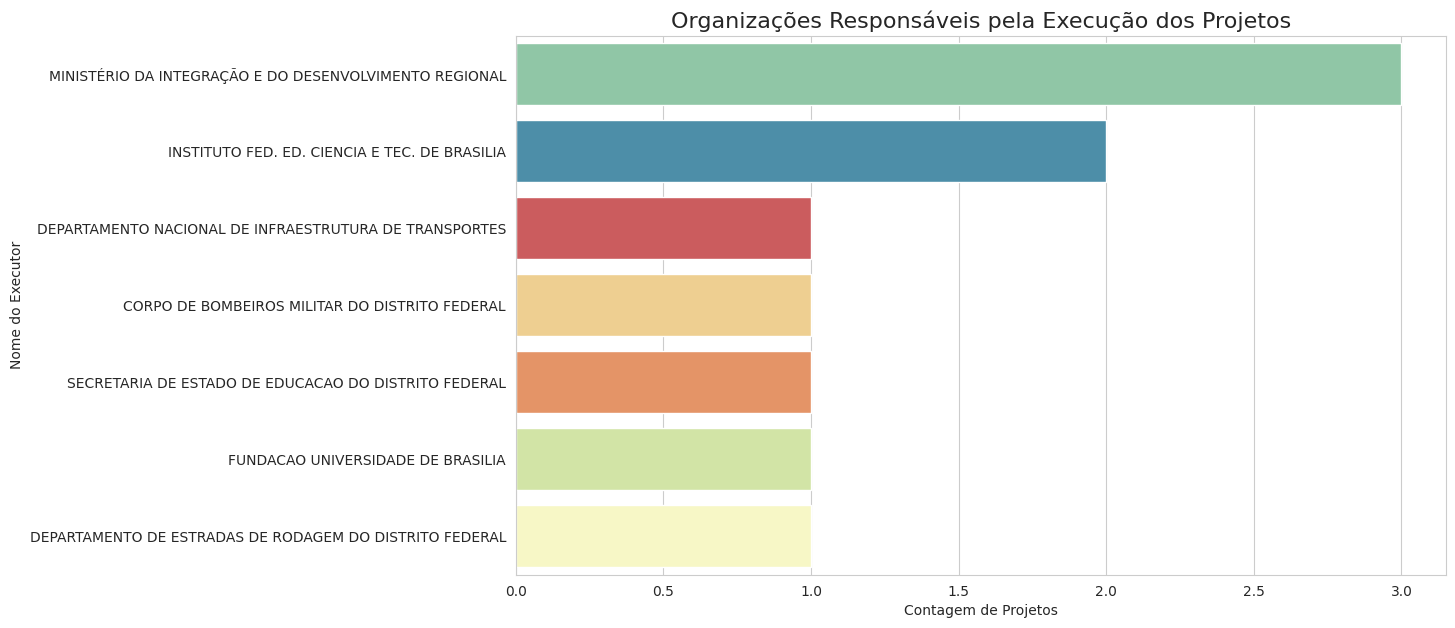

In [14]:
db_filename = 'obras_governo_df.db'
con = sqlite3.connect(db_filename)

query = """
SELECT
    f.*,
    e.eixo_descricao,
    t.tipo_descricao,
    st.sub_tipo_descricao,
    org_e.organizacao_nome as executor_nome,
    org_t.organizacao_nome as tomador_nome,
    org_r.organizacao_nome as repassador_nome
FROM
    fato_projetos f
LEFT JOIN dim_eixos e ON f.eixo_id = e.eixo_id
LEFT JOIN dim_tipos t ON f.tipo_id = t.tipo_id
LEFT JOIN dim_subtipos st ON f.sub_tipo_id = st.sub_tipo_id
LEFT JOIN dim_organizacoes org_e ON f.executor_codigo = org_e.organizacao_codigo
LEFT JOIN dim_organizacoes org_t ON f.tomador_codigo = org_t.organizacao_codigo
LEFT JOIN dim_organizacoes org_r ON f.repassador_codigo = org_r.organizacao_codigo;
"""

df_analise = pd.read_sql_query(query, con)
con.close()

sns.set_style("whitegrid")

# Gráfico 1: Contagem de Projetos por Situação
plt.figure(figsize=(10, 6))
sns.countplot(
    data=df_analise, 
    x='situacao',
    hue='situacao', 
    order=df_analise['situacao'].value_counts().index,
    palette="viridis",
    legend=False 
)
plt.title('Distribuição de Projetos por Situação Atual', fontsize=16)
plt.ylabel('Contagem de Projetos')
plt.xlabel('Situação')
plt.show()

# Gráfico 2: Contagem de Projetos por Eixo Temático 
plt.figure(figsize=(10, 6))
sns.countplot(
    data=df_analise,
    y='eixo_descricao',
    hue='eixo_descricao',
    order=df_analise['eixo_descricao'].value_counts().index,
    palette="mako",
    legend=False
)
plt.title('Contagem de Projetos por Eixo Temático', fontsize=16)
plt.ylabel('Eixo Temático')
plt.xlabel('Contagem de Projetos')
plt.show()

# Gráfico 3: Valor Total Investido por Eixo Temático
df_valor_eixo = df_analise.groupby('eixo_descricao')['fonte_recurso_valor_investimento_previsto'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_valor_eixo,
    x='fonte_recurso_valor_investimento_previsto',
    y='eixo_descricao',
    hue='eixo_descricao',
    order=df_valor_eixo.sort_values('fonte_recurso_valor_investimento_previsto', ascending=False)['eixo_descricao'],
    palette="rocket",
    legend=False
)
plt.title('Valor Total Investido por Eixo Temático', fontsize=16)
plt.xlabel('Valor Previsto (em R$)')
plt.ylabel('Eixo Temático')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.show()

# Gráfico 4: Distribuição por Origem do Recurso 
origem_counts = df_analise['fonte_recurso_origem'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(
    origem_counts,
    labels=origem_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette("Set2")
)
plt.title('Distribuição Percentual da Origem dos Recursos', fontsize=16)
plt.show()

# GRÁFICO 5: Duração Prevista dos Projetos
df_analise['data_final_prevista'] = pd.to_datetime(df_analise['data_final_prevista'])
df_analise['data_inicial_prevista'] = pd.to_datetime(df_analise['data_inicial_prevista'])
df_analise['duracao_prevista_dias'] = (df_analise['data_final_prevista'] - df_analise['data_inicial_prevista']).dt.days
plt.figure(figsize=(10, 6))
sns.histplot(
    data=df_analise,
    x='duracao_prevista_dias',
    kde=True,
    bins=5 
)
plt.title('Distribuição da Duração Prevista dos Projetos (em dias)', fontsize=16)
plt.xlabel('Duração Prevista (dias)')
plt.ylabel('Contagem de Projetos')
plt.show()

# GRÁFICO 6: Principais Executores dos Projetos
plt.figure(figsize=(12, 7))
sns.countplot(
    data=df_analise,
    y='executor_nome',
    hue='executor_nome',
    order=df_analise['executor_nome'].value_counts().index,
    palette="Spectral",
    legend=False
)
plt.title('Organizações Responsáveis pela Execução dos Projetos', fontsize=16)
plt.xlabel('Contagem de Projetos')
plt.ylabel('Nome do Executor')
plt.show()

### 5.1. Conclusão do Relatório

Após a extração e tratamento dos dados, a análise visual dos dados revela padrões, algumas inconsistências e um gargalo crítico que parece estar paralisando a maior parte das iniciativas.

#### 1. 90% dos Projetos estão Parados

**O que o Gráfico Mostra:**  
*(Gráfico: Distribuição de Projetos por Situação Atual)*  
Vemos que **9 de cada 10 projetos (90%)** estão na situação `cadastrada`. Apenas **1 projeto** foi `cancelado`.

**Conclusão:**  
`Cadastrada` é a etapa inicial do processo. Isso significa que **90% da carteira de projetos analisada ainda não começou a ser executada**. Eles estão, aguardando o próximo passo.  
Não há projetos `em execução` ou `paralisados` nesta amostra, eles simplesmente não saíram do papel.

#### 2. Gargalo de Financiamento Federal

**O que os Gráficos Mostram:**  
- *(Gráfico: Origem dos Recursos)* → **100% dos fundos** para esses projetos vêm da esfera **Federal**.  
- *(Gráfico: Organizações Responsáveis)* → A execução dos projetos é majoritariamente de **órgãos federais**, como o **Ministério da Integração** (3 projetos) e o **Instituto Federal** (2 projetos).

**Hipótese:**  
A combinação de uma **dependência total de recursos federais** com a **paralisação de 90% dos projetos no estágio inicial** sugere um **gargalo no repasse de verbas federais**.  
Os projetos estão cadastrados e aguardando a liberação do financiamento para que os órgãos executores possam iniciar os trabalhos.

#### 3. Onde os Projetos Estão Travados?

**O que o Gráfico Mostra:**  
*(Gráfico: Contagem de Projetos por Eixo Temático)*  
A grande maioria dos projetos (**60%**) pertence ao eixo `Social`. O eixo `Econômico` vem em segundo (**30%**), seguido pelo `Administrativo` (**10%**).

**Conclusão:**  
O gargalo de financiamento está impactando primariamente a **área social**.  
São **6 projetos sociais** que aguardam para serem iniciados.

#### 4. Faltam Informações Financeiras

**O que o Gráfico Mostra:**  
*(Gráfico: Valor Total Investido por Eixo Temático)*  
O gráfico de valor está **completamente vazio**.

**Hipótese:**  
Isso não é um erro no gráfico, é uma **falha nos dados**.  
A informação de valor **não foi preenchida na fonte**.  
A hipótese é que o **valor do investimento só é formalmente alocado quando o projeto sai da situação `cadastrada`** e é aprovado para execução.  
Como 90% dos projetos estão travados na etapa inicial, o valor deles ainda consta como **`zero` ou nulo** no sistema.  
Isso reforça a hipótese do **gargalo de financiamento**.

#### 5. Perfil dos Projetos

**O que o Gráfico Mostra:**  
*(Gráfico: Distribuição da Duração Prevista)*  
O perfil de duração dos projetos é dividido: a maioria (**6 projetos**) é de **curto prazo** (menos de 400 dias).  
Os outros **4 projetos** são de médio a longo prazo.

**Conclusão:**   
Se o gargalo de financiamento for resolvido, **60% da carteira de projetos** poderiam ser entregues em pouco mais de um ano, **gerando impacto social significativo** em um curto espaço de tempo.
